# Exploratory Data Analysis

This notebook will focus on Exploratory Data Analysis of a financial data set. It will use classes I have made to:

- Convert data types correctly so that analysis can be performed on then
- Clean by data by dropping unneeded columns and imputing missing values in columns that contain null values
- Analyse data
- Visualize data

## Necessary Imports

In [14]:
import pandas as pd
import seaborn as sns
import missingno as msno
import db_utils
from dataFrameInfo import Data_FrameInfo
from dataFrameTransform import Data_FrameTransform
import dataFrameTransform
import plotter
from data_Transform import DataTransform

## Loading in the dataset

At this point, it is necessary to familarise ourselves with the data at hand to work out what transformations need to be performed and how best to do this

In [15]:
df = pd.read_csv('loan_payments.csv')
df.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,...,0.0,0.0,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,...,0.0,0.0,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,...,0.0,0.0,Oct-2021,12850.16,NaN,Oct-2021,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,...,0.0,0.0,Jun-2021,13899.67,NaN,Jun-2021,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,...,0.0,0.0,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL


In [16]:
print(df.dtypes)

id                               int64
member_id                        int64
loan_amount                      int64
funded_amount                  float64
funded_amount_inv              float64
term                            object
int_rate                       float64
instalment                     float64
grade                           object
sub_grade                       object
employment_length               object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_date                      object
loan_status                     object
payment_plan                    object
purpose                         object
dti                            float64
delinq_2yrs                      int64
earliest_credit_line            object
inq_last_6mths                   int64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_accounts                    int64
total_accounts           

## Ensuring data is the correct type

It is clear that some data needs to be formatted for better use. For instance, the term of the loan could be better represented as an integer with the title informing the user that it is in months. Therefore the "months" can be stripped from each individual entry leaving an integer.

In [17]:
df.rename(columns={"term": "term(mths)"},inplace=True)
df['term(mths)'] = df['term(mths)'].str.replace("months", " ")
df.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36,7.49,248.82,A,A4,...,0.0,0.0,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36,6.99,407.52,A,A3,...,0.0,0.0,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36,7.49,497.63,A,A4,...,0.0,0.0,Oct-2021,12850.16,NaN,Oct-2021,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36,14.31,514.93,C,C4,...,0.0,0.0,Jun-2021,13899.67,NaN,Jun-2021,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36,6.03,456.54,A,A1,...,0.0,0.0,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL


From analysing the data, it is clear that some entrys are "N/A" or are blank. I need to change these to NaN before I can convert the data type of the column. This isn't appropriate for every column so I will choose these carefully. 

I will deal with missing data more substantially later in the project.


In [18]:
cols_to_fill = ['mths_since_last_delinq', 'mths_since_last_record', 'collections_12_mths_ex_med', 'mths_since_last_major_derog']

transform = DataTransform

for col in cols_to_fill:
    transform.fill_blanks(df, col)

df.head(25)
    

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36,7.49,248.82,A,A4,...,0.0,0.0,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36,6.99,407.52,A,A3,...,0.0,0.0,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36,7.49,497.63,A,A4,...,0.0,0.0,Oct-2021,12850.16,NaN,Oct-2021,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36,14.31,514.93,C,C4,...,0.0,0.0,Jun-2021,13899.67,NaN,Jun-2021,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36,6.03,456.54,A,A1,...,0.0,0.0,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
5,38656111,41439917,2525,2525.0,2525.0,36,11.44,83.20,B,B4,...,0.0,0.0,Jan-2022,91.39,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
6,38656110,41439916,6675,6675.0,6675.0,NaN,21.99,254.89,E,E5,...,0.0,0.0,Mar-2021,6724.95,NaN,Mar-2021,0.0,NaN,1,INDIVIDUAL
7,38656067,41439872,26500,26500.0,26200.0,NaN,19.99,701.95,E,E3,...,0.0,0.0,Aug-2021,701.95,NaN,Jan-2022,0.0,43.0,1,INDIVIDUAL
8,38656063,41439868,10000,10000.0,10000.0,60,12.99,227.48,C,C2,...,0.0,0.0,Jan-2022,227.48,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
9,38656052,41439857,10000,NaN,10000.0,36,8.19,314.25,A,A5,...,0.0,0.0,Jan-2022,314.25,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL


From the dtypes cell above, some of the data types can be recasted. I will make a list of each column and what type it should be so I can apply my methods in a more efficient manner

In [19]:
cat_data = ['id', 'member_id','grade','sub_grade','home_ownership','verification_status','loan_status', 'purpose','application_type','employment_length']
int_data = []
float_data = ['term(mths)', 'mths_since_last_delinq','mths_since_last_record', 'collections_12_mths_ex_med','mths_since_last_major_derog']
bool_data = ['payment_plan']
date_data = ['issue_date', 'earliest_credit_line', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date']

for col in cat_data:
    transform.cat_type(df,col)

for col in int_data:
    transform.num_type(df,col)

for col in float_data:
    transform.float_type(df,col)

for col in bool_data:
    transform.bool_type(df,col)

for col in date_data:
    transform.convert_dates(df,col)

print(df.dtypes)

id                                   category
member_id                            category
loan_amount                             int64
funded_amount                         float64
funded_amount_inv                     float64
term(mths)                            float64
int_rate                              float64
instalment                            float64
grade                                category
sub_grade                            category
employment_length                    category
home_ownership                       category
annual_inc                            float64
verification_status                  category
issue_date                     datetime64[ns]
loan_status                          category
payment_plan                             bool
purpose                              category
dti                                   float64
delinq_2yrs                             int64
earliest_credit_line           datetime64[ns]
inq_last_6mths                    

In [20]:
df.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term(mths),int_rate,instalment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36.0,7.49,248.82,A,A4,...,0.0,0.0,2022-01-01,248.82,2022-02-01,2022-01-01,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36.0,6.99,407.52,A,A3,...,0.0,0.0,2022-01-01,407.52,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36.0,7.49,497.63,A,A4,...,0.0,0.0,2021-10-01,12850.16,NaT,2021-10-01,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36.0,14.31,514.93,C,C4,...,0.0,0.0,2021-06-01,13899.67,NaT,2021-06-01,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36.0,6.03,456.54,A,A1,...,0.0,0.0,2022-01-01,456.54,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL


## Dealing with missing data

Some data is missing from the table. In some cases, so much data is missing that it is not worth keeping the column at all. In other cases, it will be sufficient to impute the missing values. Depending on what is most reasonable, I will likely impute with the mean or median.

First however, it is necessary to see where the missing data is actually located. For this, I will use the missingno package to visualize this. By using the bar method and heatmap method, it will enable me to see which columns have missing data and if there is any correlation between this.

### Visualization

First however, it is necessary to see where the missing data is actually located. For this, I will use the missingno package to visualize this. By using the bar method and heatmap method, it will enable me to see which columns have missing data and if there is any correlation between this.

<Axes: >

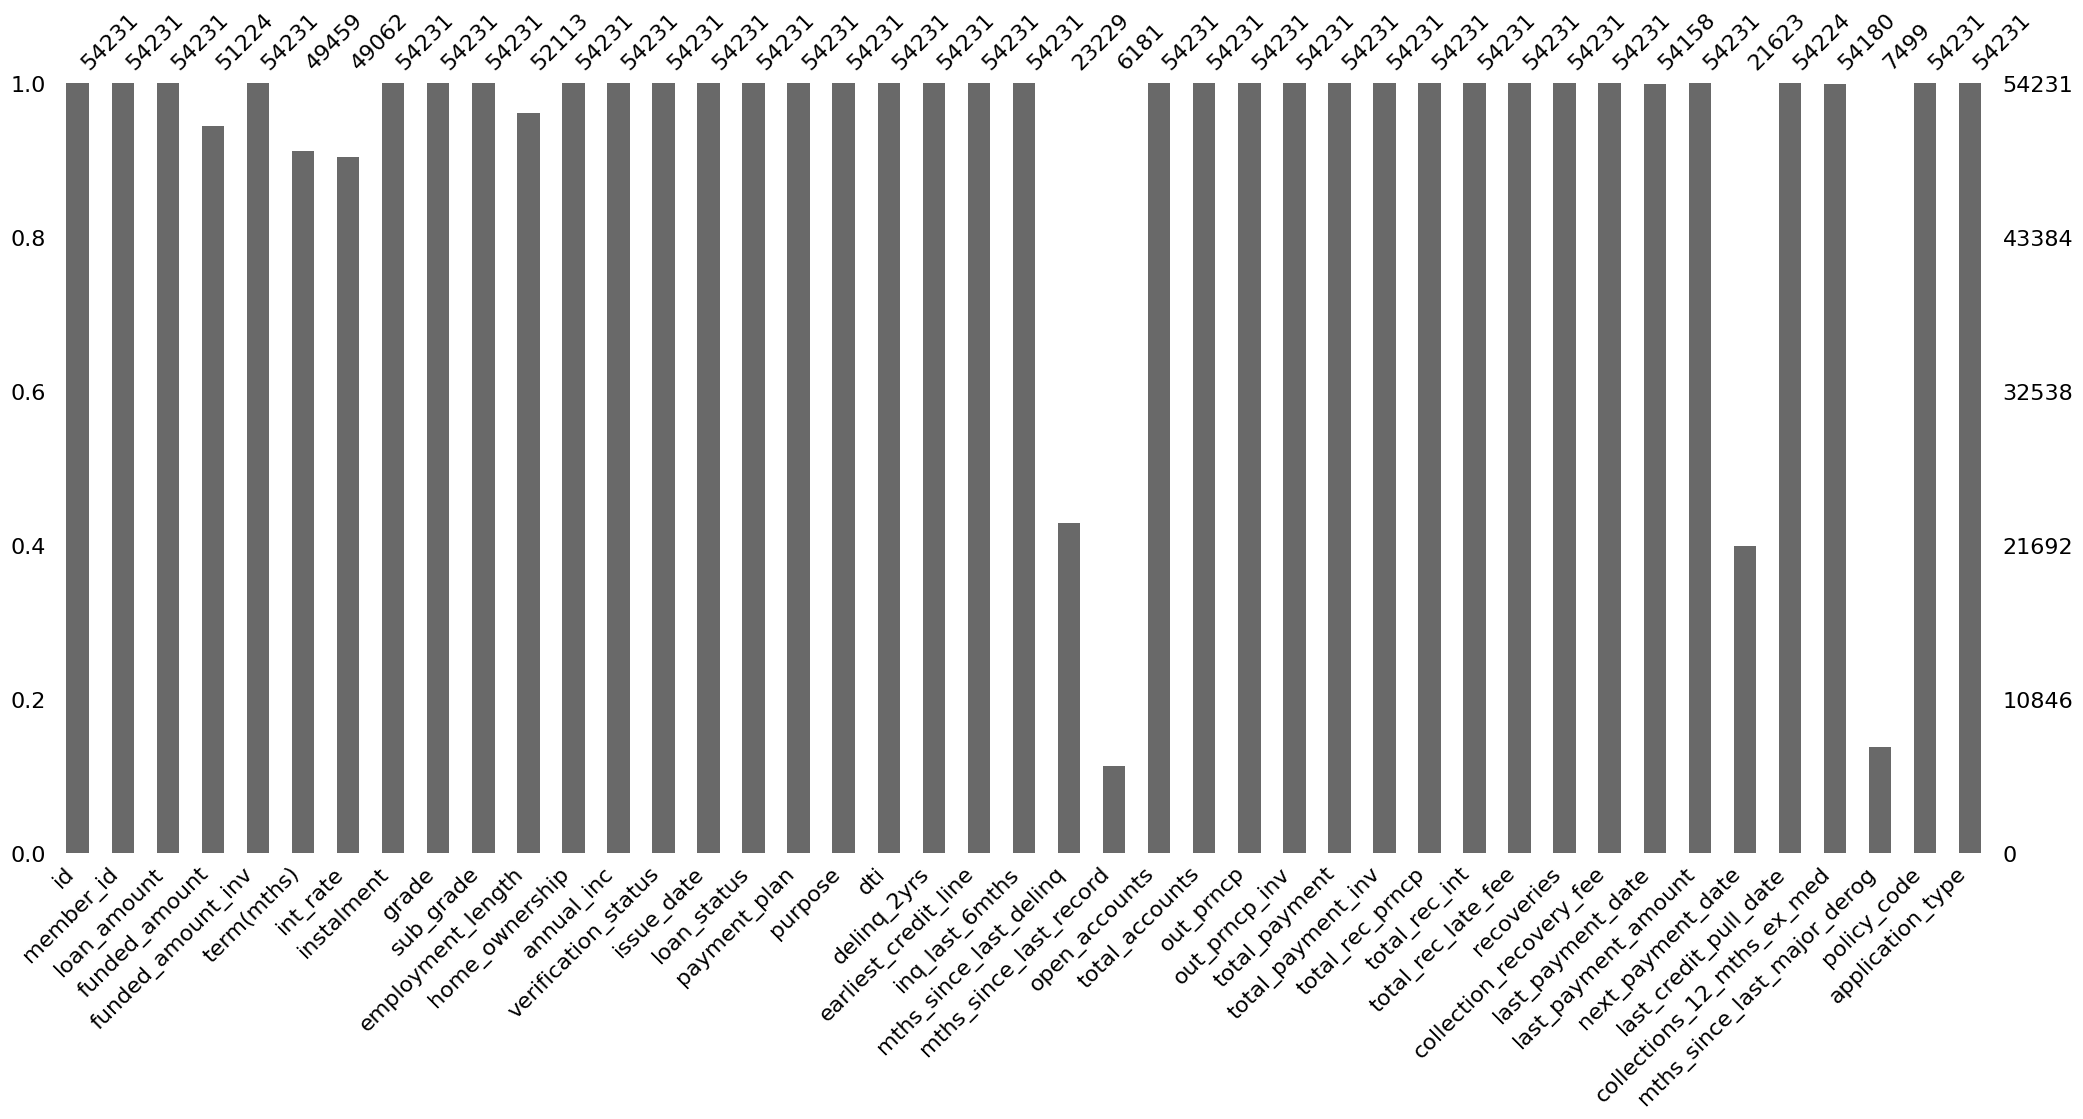

In [21]:
msno.bar(df)

<Axes: >

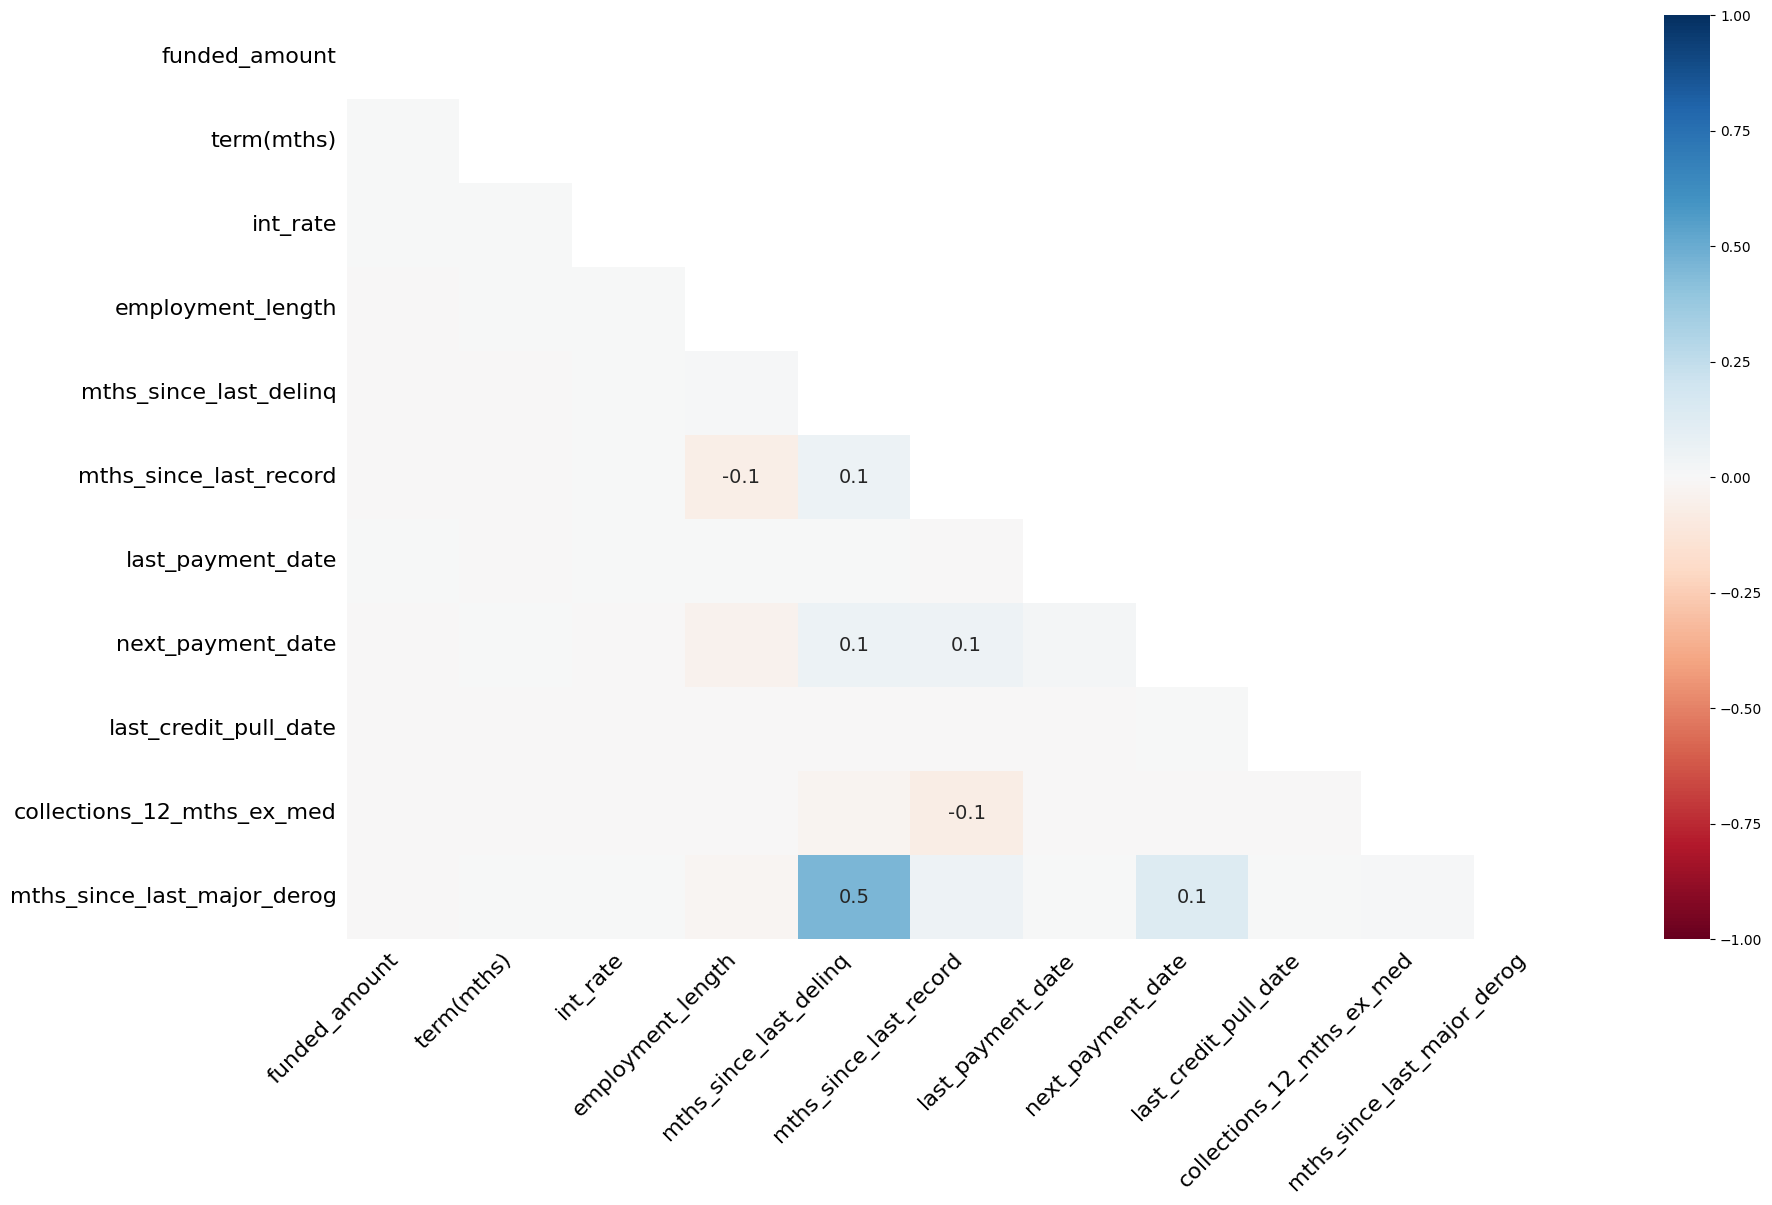

In [22]:
msno.heatmap(df)

As can be seen from the bar model, some columns have only a small amount of missing values and some have a large amount of missing data. These columns need to be dropped. I will use a method to drop those colums of over 50% missing values. The method allows the user to set the percentage to something different for other uses.

In [23]:
dataframetransform = Data_FrameTransform()

df = dataframetransform.Nullremoval(df,50)
df.head()
print(df.shape)

             id member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116  41461848         8000         8000.0             8000.0   
1      38656203  41440010        13200        13200.0            13200.0   
2      38656154  41439961        16000        16000.0            16000.0   
3      38656128  41439934        15000        15000.0            15000.0   
4      38656121  41439927        15000        15000.0            15000.0   
...         ...       ...          ...            ...                ...   
54226     76597     76583         5000         5000.0             1775.0   
54227    142608     74724         5000         5000.0             2350.0   
54228    117045     70978         3500         3500.0             2225.0   
54229     88854     70699         5000         5000.0              225.0   
54230     72323     70694         5000         5000.0              350.0   

       term(mths)  int_rate  instalment grade sub_grade  ... total_rec_int  \
0        

<Axes: >

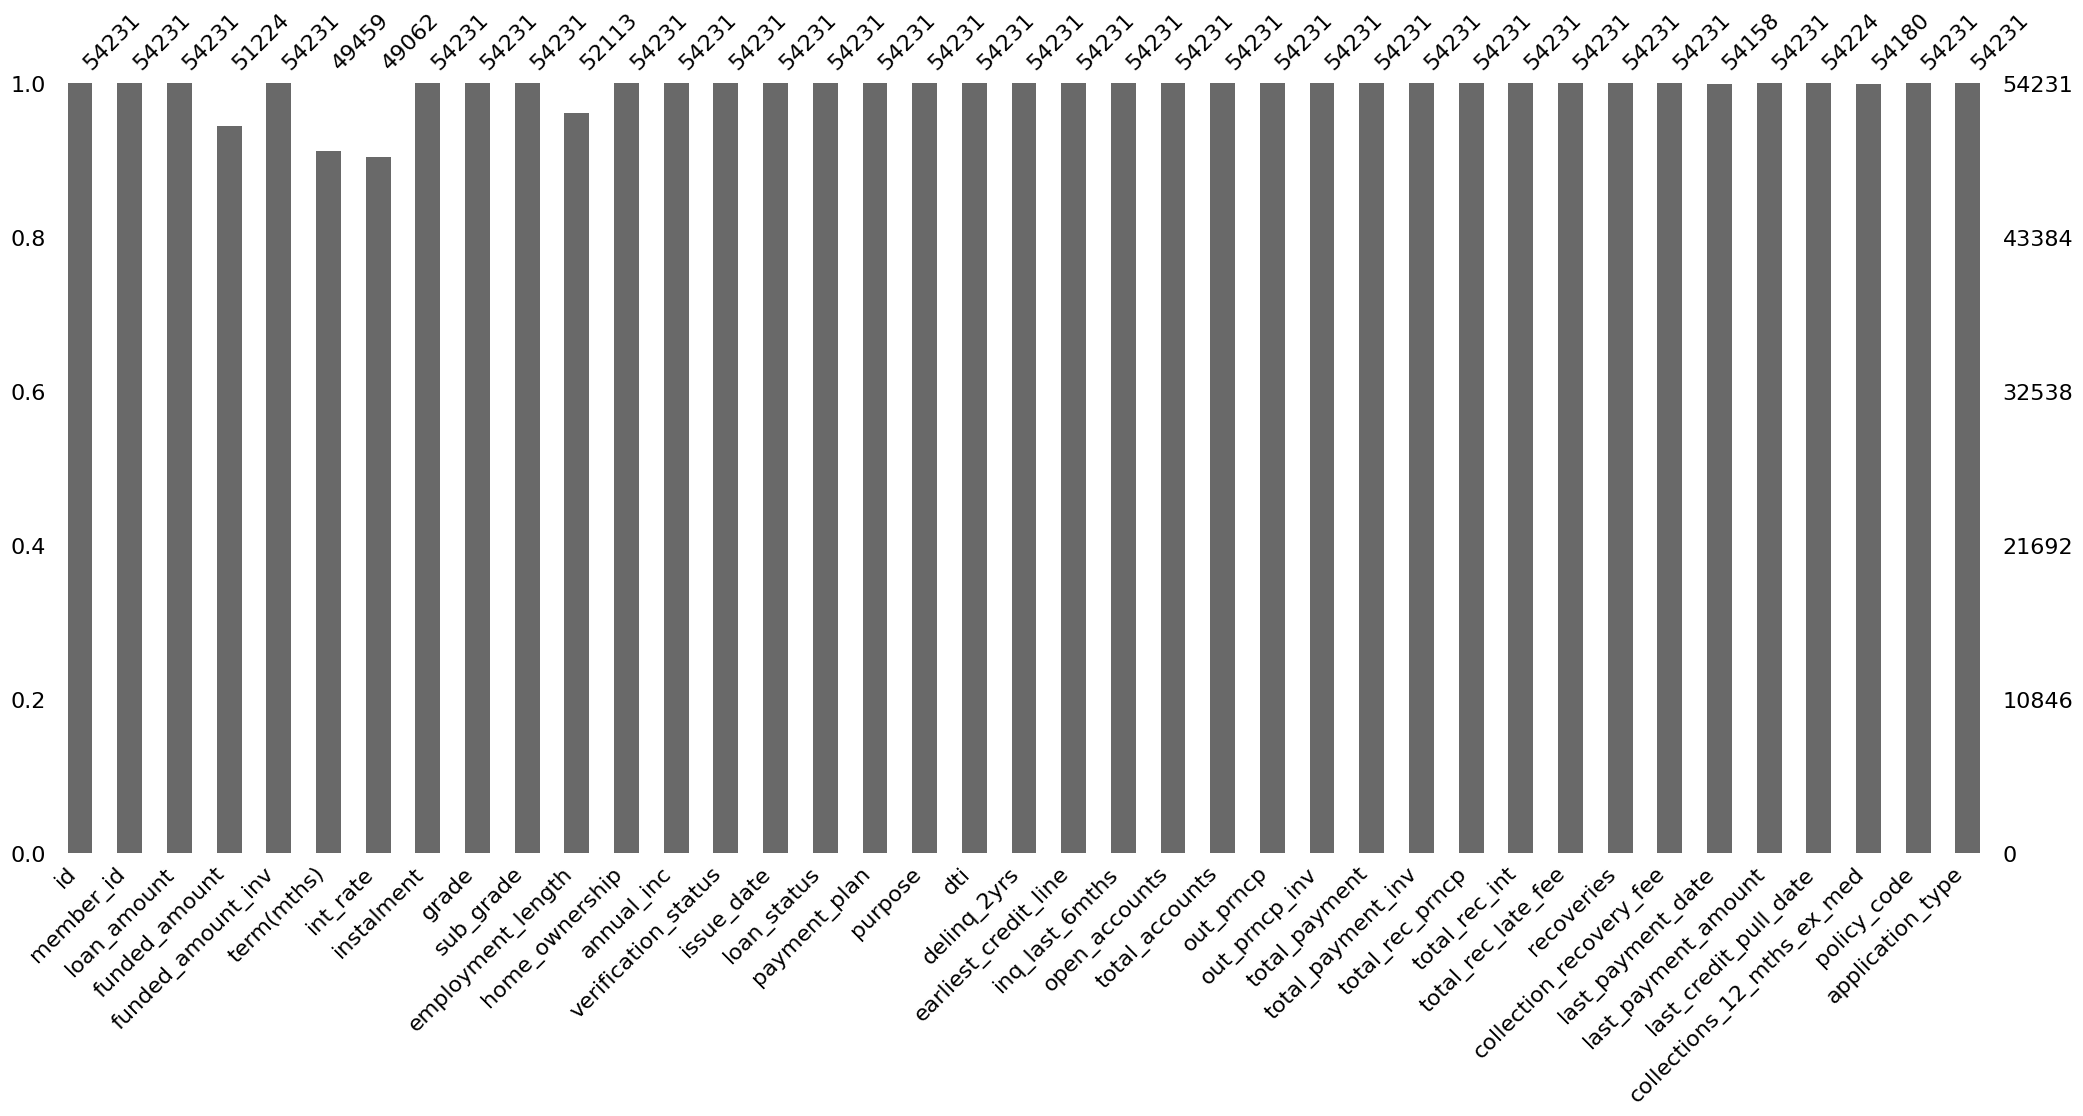

In [24]:
msno.bar(df)

In [25]:
dataframeinfo = Data_FrameInfo()

dataframeinfo.get_mean(df, 'loan_amount')

 #finds the number of unique entries for columns with categorical data
cols_to_count=['application_type','loan_status','verification_status','home_ownership','home_ownership','grade','sub_grade']

for col in cols_to_count:
    dataframeinfo.count_distinct(df,col)

13333.08
unique application_type values: 1
unique loan_status values: 9
unique verification_status values: 3
unique home_ownership values: 5
unique home_ownership values: 5
unique grade values: 7
unique sub_grade values: 35


Revisualising the data now shows a lot less missing information. With the remaining values, more investigation is needed to decide whether to impute the mean or median

<Axes: >

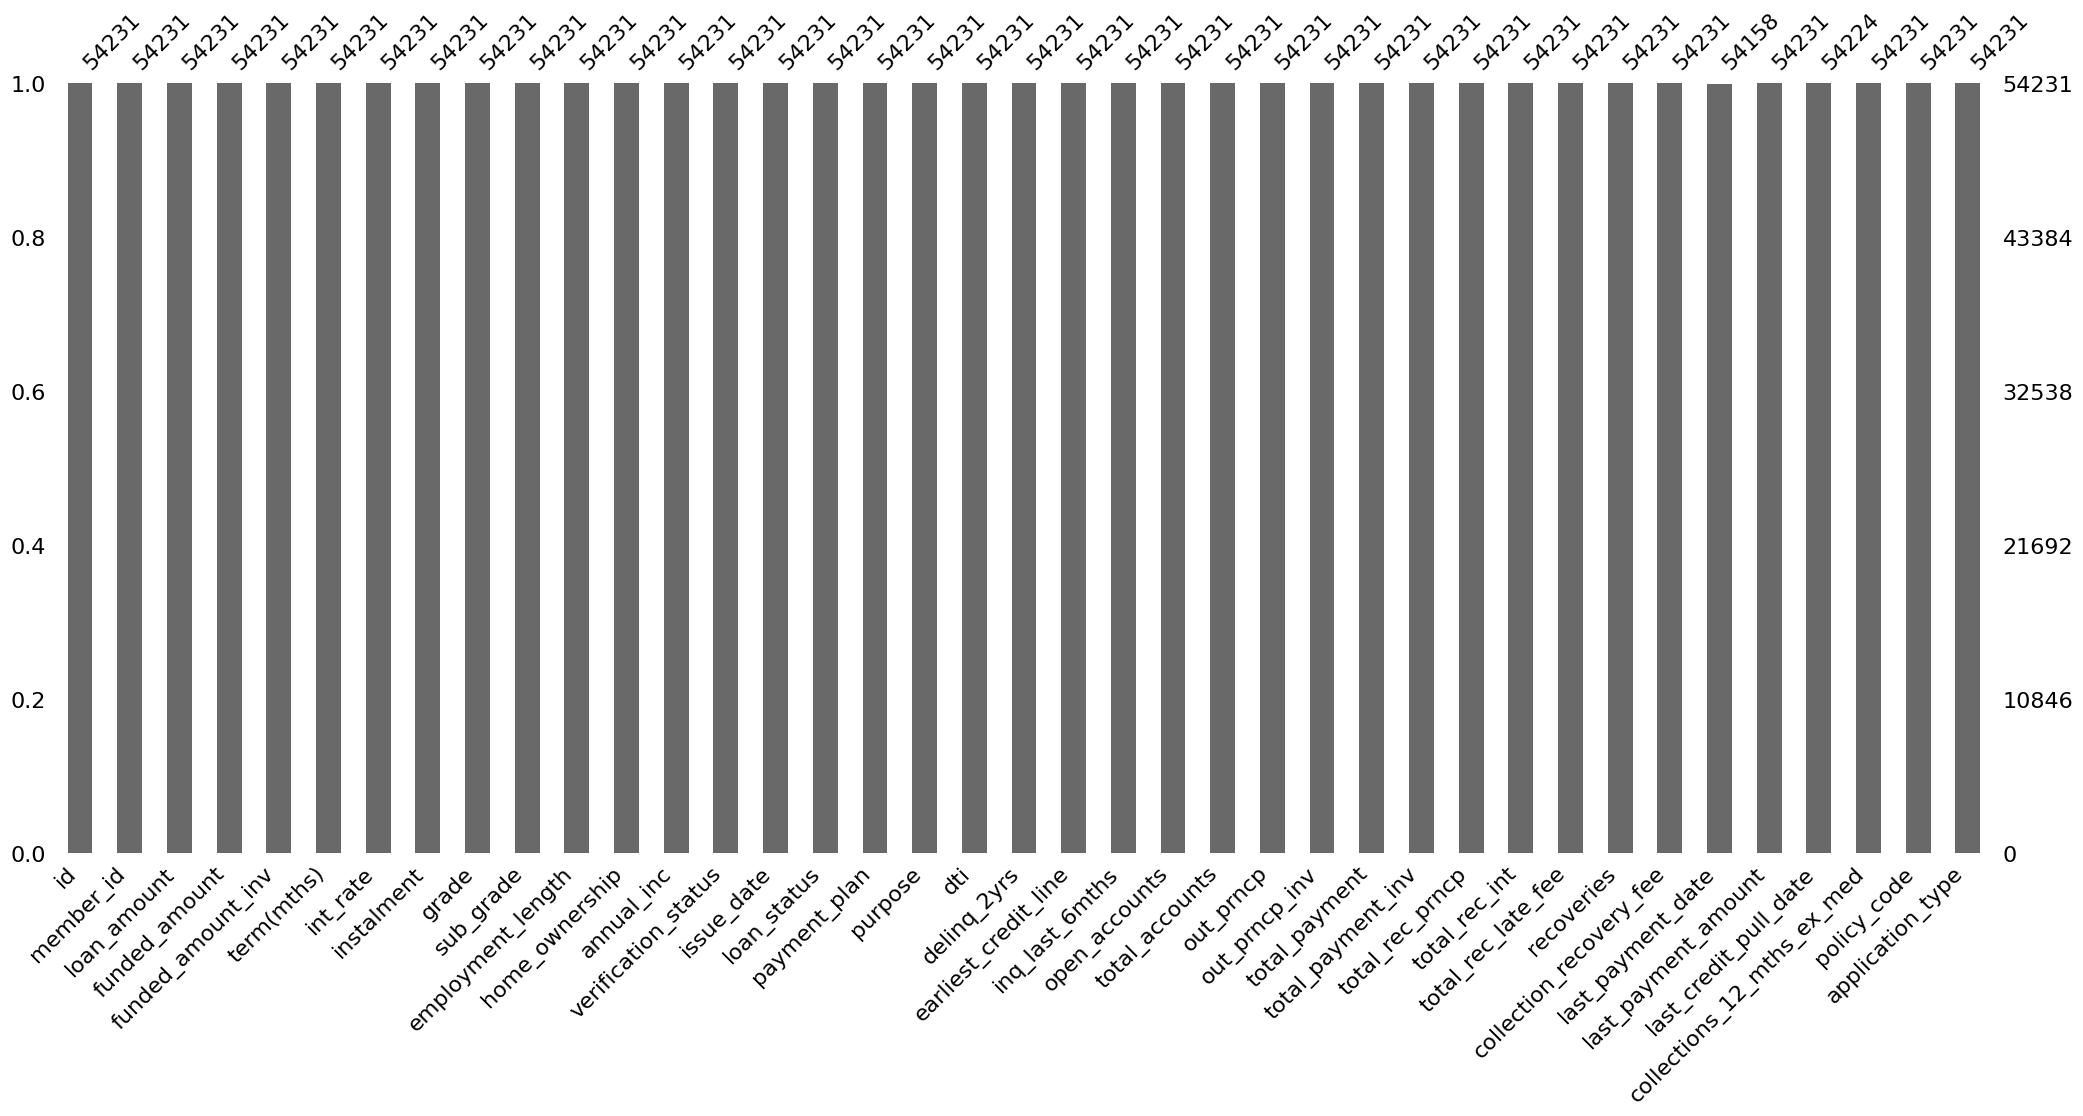

In [27]:
dataframetransform.impute_null_values(df)

df.head()

msno.bar(df)